In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import sklearn

plt.rcParams['figure.figsize'] = (25, 8)
plt.rcParams['figure.titlesize'] = 30
plt.rcParams['font.size'] = 20
plt.rcParams['axes.titlepad'] = 20 

<br>
<h1 align=center> Clustering en Finance</h1>
<h1 align=center> Part 2</h1>
<hr>

In [110]:
df_actions=pd.read_csv('./data/43actions.csv', parse_dates=[0])
df_actions.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Moyenne,Variation,Variation_Relative,Ampli_Relative,Variation_Jour,Variation_Jour_Relative,Symbol,Company
0,2019-04-02,1195.319946,1201.349976,1185.709961,1200.489990,1200.489990,827900.0,1195.849976,5.170044,0.004323,0.013079,NaN,NaN,GOOG,Google
1,2019-04-03,1207.479980,1216.300049,1200.500000,1205.920044,1205.920044,1017800.0,1207.573364,-1.559936,-0.001292,0.013084,11.723389,0.009708,GOOG,Google
2,2019-04-04,1205.939941,1215.670044,1204.130005,1215.000000,1215.000000,950000.0,1211.600016,9.060059,0.007478,0.009525,4.026652,0.003323,GOOG,Google
3,2019-04-05,1214.989990,1216.219971,1205.030029,1207.150024,1207.150024,907200.0,1209.466675,-7.839966,-0.006482,0.009252,-2.133342,-0.001764,GOOG,Google
4,2019-04-08,1207.890015,1208.689941,1199.859985,1203.839966,1203.839966,860200.0,1204.129964,-4.050049,-0.003363,0.007333,-5.336711,-0.004432,GOOG,Google


In [111]:
df_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
Date                       946 non-null datetime64[ns]
Open                       946 non-null float64
High                       946 non-null float64
Low                        946 non-null float64
Close                      946 non-null float64
Adj Close                  946 non-null float64
Volume                     946 non-null float64
Moyenne                    946 non-null float64
Variation                  946 non-null float64
Variation_Relative         946 non-null float64
Ampli_Relative             946 non-null float64
Variation_Jour             903 non-null float64
Variation_Jour_Relative    903 non-null float64
Symbol                     946 non-null object
Company                    946 non-null object
dtypes: datetime64[ns](1), float64(12), object(2)
memory usage: 110.9+ KB


In [112]:
# Transform to ndarray 3D
groups=df_actions.groupby('Symbol')
np_actions=[]
for name,action in groups:
    act=np.array(action.iloc[:,1:-1].values).reshape(-1)
    np_actions.append(act)
    
np_actions=np.array(np_actions)
print(np_actions.shape)

(43, 286)


In [113]:
np_actions=np.array(df_actions.iloc[:,1:-1].values)

In [114]:
#Preparation des données pour la classification
def pivot_table(df,col):
    df= df.pivot(index='Company',columns='Date',values=col)
        #Normalized datas
    df.fillna(0, inplace=True)
    quotes=sklearn.preprocessing.normalize(df, axis=1)
    df_normed=pd.DataFrame(data=quotes, columns=df.columns, index=df.index)
    return df_normed

p=pivot_table(df_actions,'Variation_Jour_Relative')


In [115]:
p.head()

Date,2019-04-02 00:00:00,2019-04-03 00:00:00,2019-04-04 00:00:00,2019-04-05 00:00:00,2019-04-08 00:00:00,2019-04-09 00:00:00,2019-04-10 00:00:00,2019-04-11 00:00:00,2019-04-12 00:00:00,2019-04-15 00:00:00,...,2019-04-18 00:00:00,2019-04-22 00:00:00,2019-04-23 00:00:00,2019-04-24 00:00:00,2019-04-25 00:00:00,2019-04-26 00:00:00,2019-04-29 00:00:00,2019-04-30 00:00:00,2019-05-01 00:00:00,2019-05-02 00:00:00
Company,,,,,,,,,,,,,,,,,,,,,
Adobe Systems Incorporated,0.0,0.125672,-0.370830,0.024549,-0.037706,0.086545,0.188067,0.076363,0.016121,0.009668,...,-0.068664,0.153613,0.403163,0.050149,0.018196,0.213879,0.596495,0.026388,-0.172105,-0.394663
"Amazon.com, Inc.",0.0,0.111702,-0.044867,0.257281,0.125478,-0.023221,0.017847,0.052923,0.007945,-0.131652,...,-0.050064,0.150227,0.606837,-0.065266,-0.023045,0.369820,0.144139,-0.297338,-0.017298,-0.309743
Apple Inc.,0.0,0.149792,0.005475,0.131139,0.178276,0.130752,-0.054510,-0.030787,-0.085318,0.050172,...,0.141954,0.033516,0.189403,0.091588,-0.117397,-0.176595,0.078738,-0.299055,0.804196,-0.130462
"Autodesk, Inc.",0.0,0.315389,-0.156954,0.093174,-0.072424,0.126132,0.332383,0.210764,0.074333,0.039006,...,-0.221891,0.346109,0.438787,0.176860,-0.112814,0.100642,0.118262,0.015608,-0.194762,-0.284352
BP plc (ADR),0.0,-0.003456,-0.090203,0.189241,0.365681,-0.083256,0.061005,-0.150100,-0.022195,-0.037623,...,-0.120517,0.277242,0.072904,-0.419532,-0.175709,-0.347916,-0.156474,0.406953,-0.252509,-0.300541


In [116]:
# Recherche du nombre adequat de groupes
from sklearn import metrics

def evaluate(df):
    sil=np.arange(18, dtype='double')
    see=[]
    for i in np.arange(18):
        km=KMeans(n_clusters=i+2, random_state=32)
        km.fit(df)
        sil[i]=metrics.silhouette_score(df, km.labels_,random_state=32, metric='euclidean')
        see.append(km.inertia_)
    plt.plot(np.arange(2,20),sil)
    plt.title('Silhouette des scores')
    plt.ylabel('score')
    plt.xlabel('nombre de clusters')
    plt.xticks(np.arange(2,20,step=1))
    plt.grid(True)
    plt.show()
    plt.plot(np.arange(2,20),see,'-o')
    plt.title('Méthode Elbow')
    plt.xlabel('Nombre de clusters')
    plt.ylabel('Somme des distances au carré')
    plt.xticks(np.arange(2,20,step=1))
    plt.grid(True)
    plt.show
    

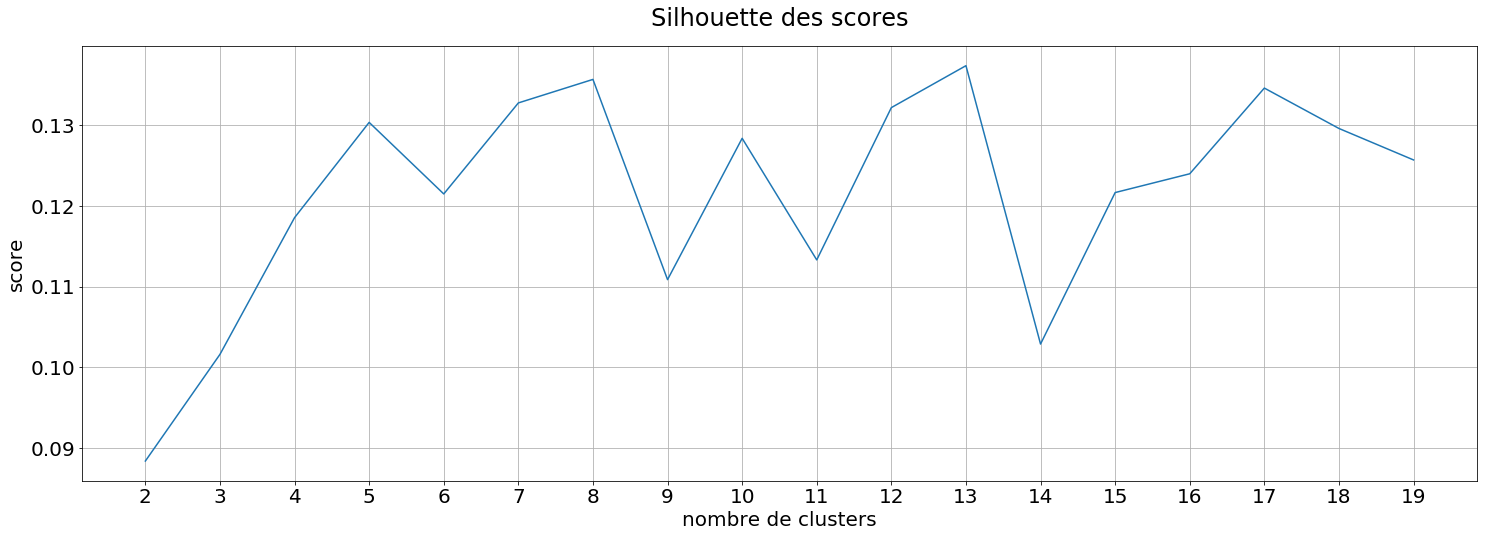

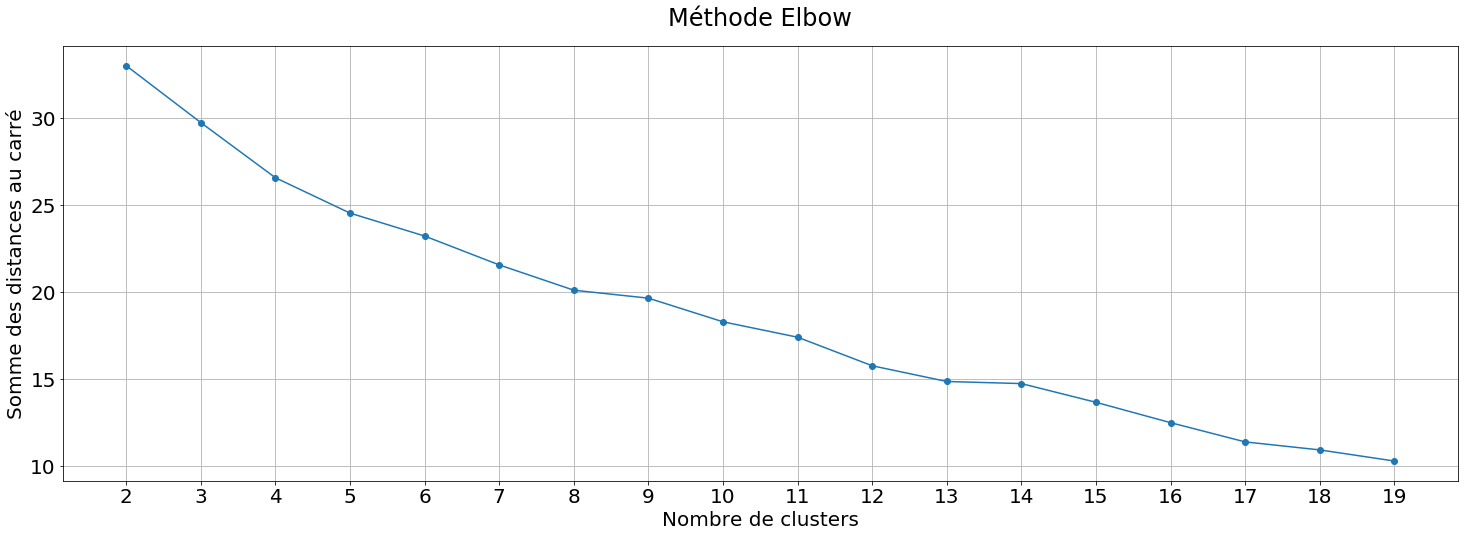

In [117]:
evaluate(p)

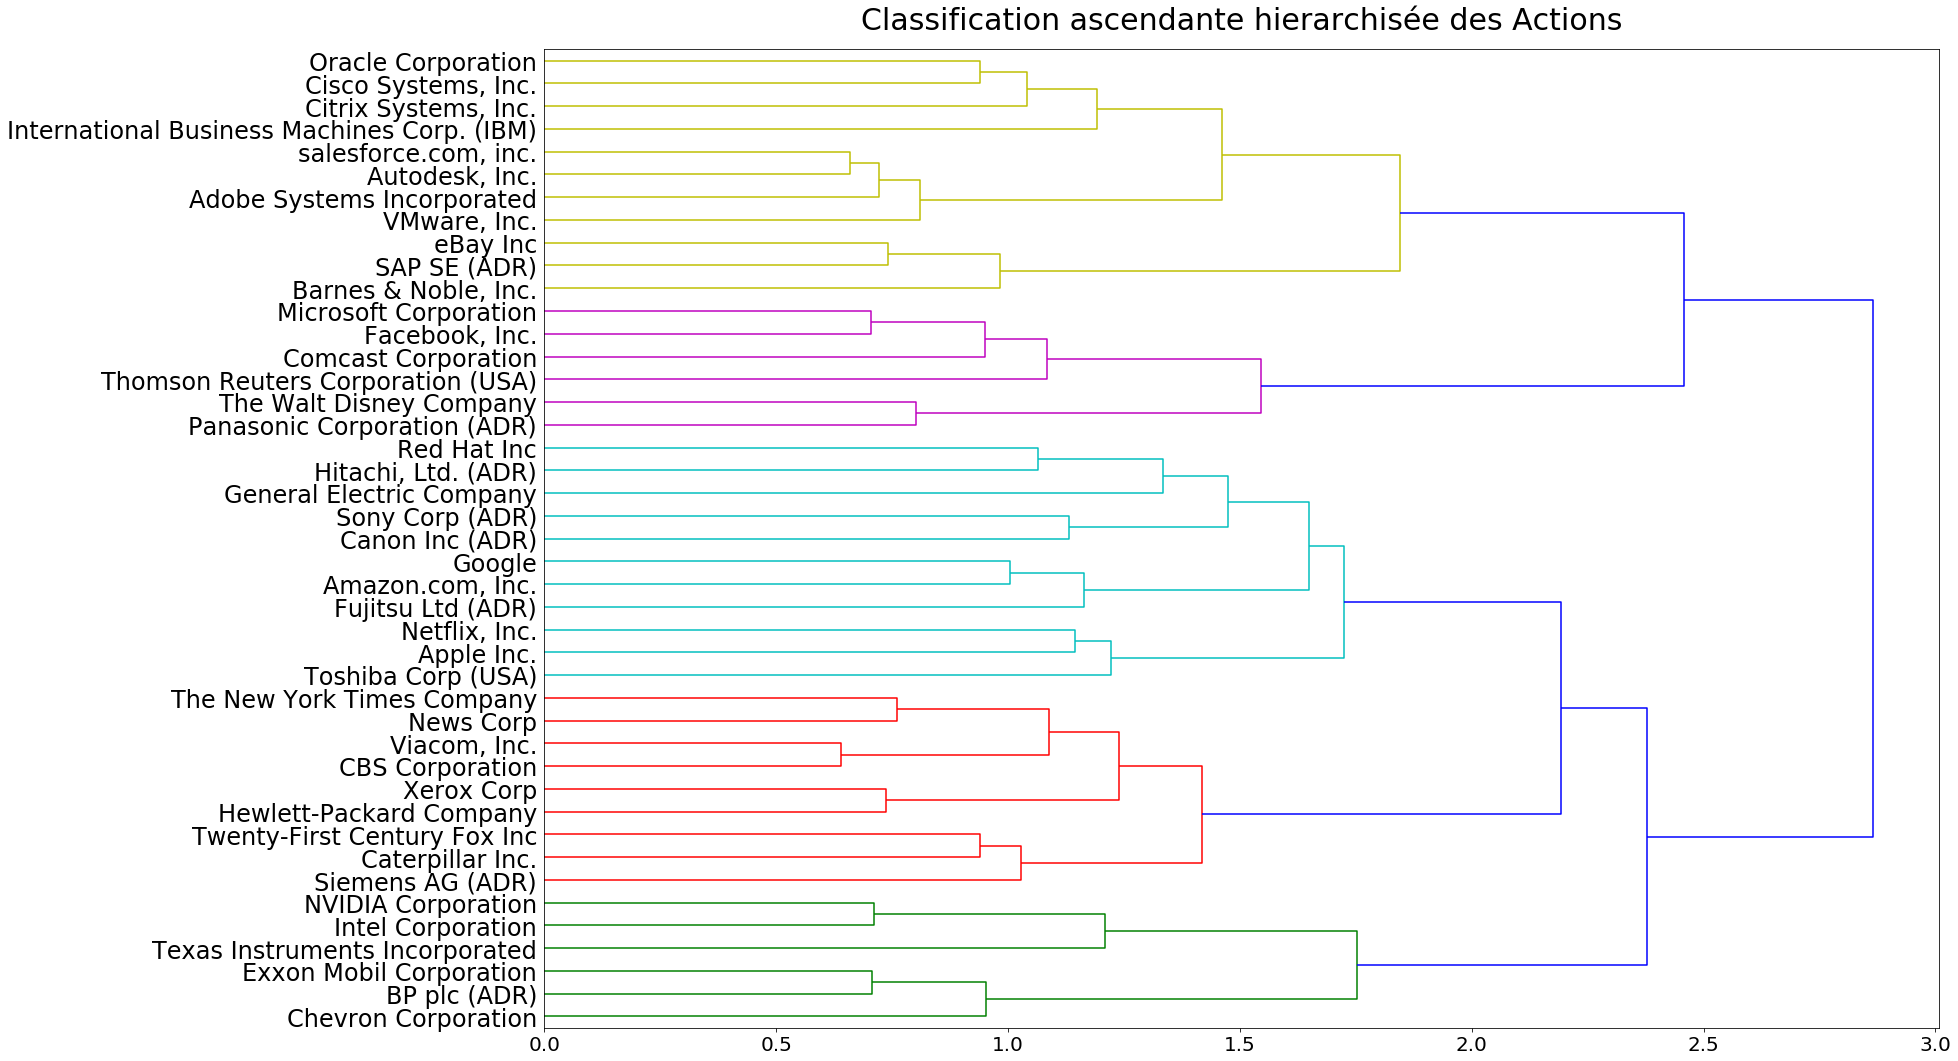

In [118]:
#Visualisation du dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
mat=linkage(p,method='ward',metric='euclidean')
plt.figure(figsize=(25,18))
plt.title('Classification ascendante hierarchisée des Actions', fontsize=30)
dendrogram(mat, labels=p.index,orientation='right',color_threshold=2)
#plt.ylabel('Companies',fontsize='large')
plt.yticks(fontsize='large')
plt.show()


In [119]:
# from sklearn.cluster import KMeans

# # Entrainement 
# model = KMeans(n_clusters=5, random_state=32).fit(p)
# model.labels_

# # Affichage dans un tableau
# df_actions.Company.unique()
# x=dict(zip(df_actions.Company.unique(),model.labels_))
# print(x)
# # frok = fro.copy()
# # frok['groupe']=kmeans.labels_
# # frok[['groupe']].sort_values(by='groupe')
# def get_cluster(el):
#     for key, val in dic.items():
#         if (key==el):
#             return val

# #df_actions['Cluster']=df_actions.Company.apply(get_cluster)

# def add_cluster(df,model):
#     x=dict(zip(df.Company.unique(),model.labels_))
#     df['Cluster']=df.Company.apply(get_cluster)
#     return df


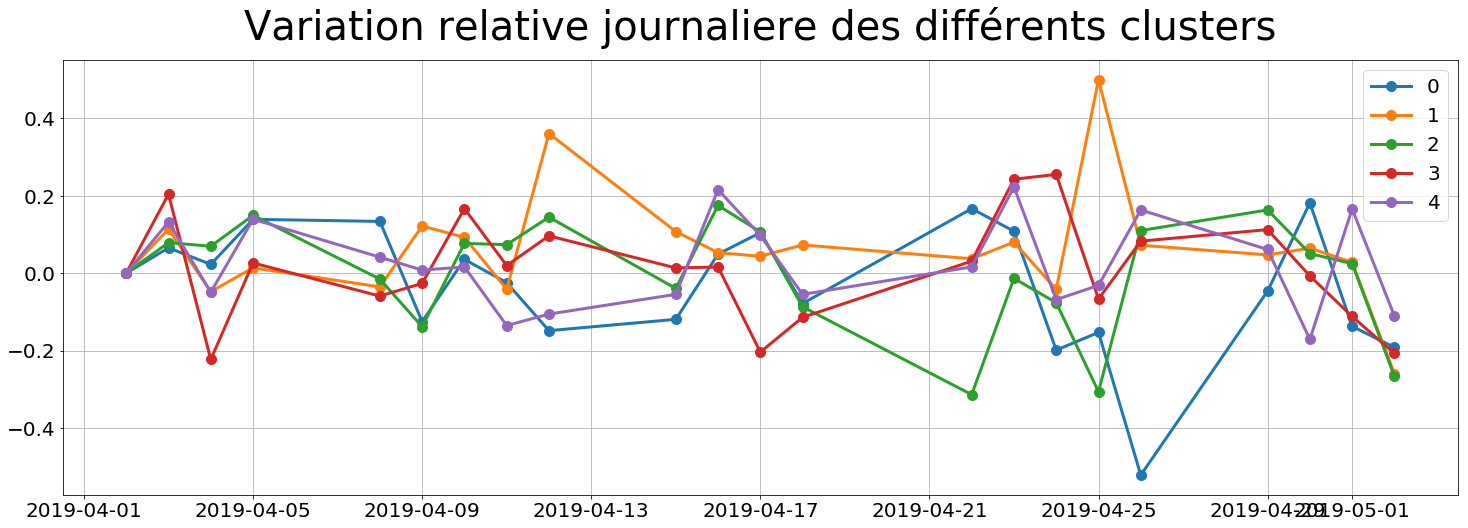

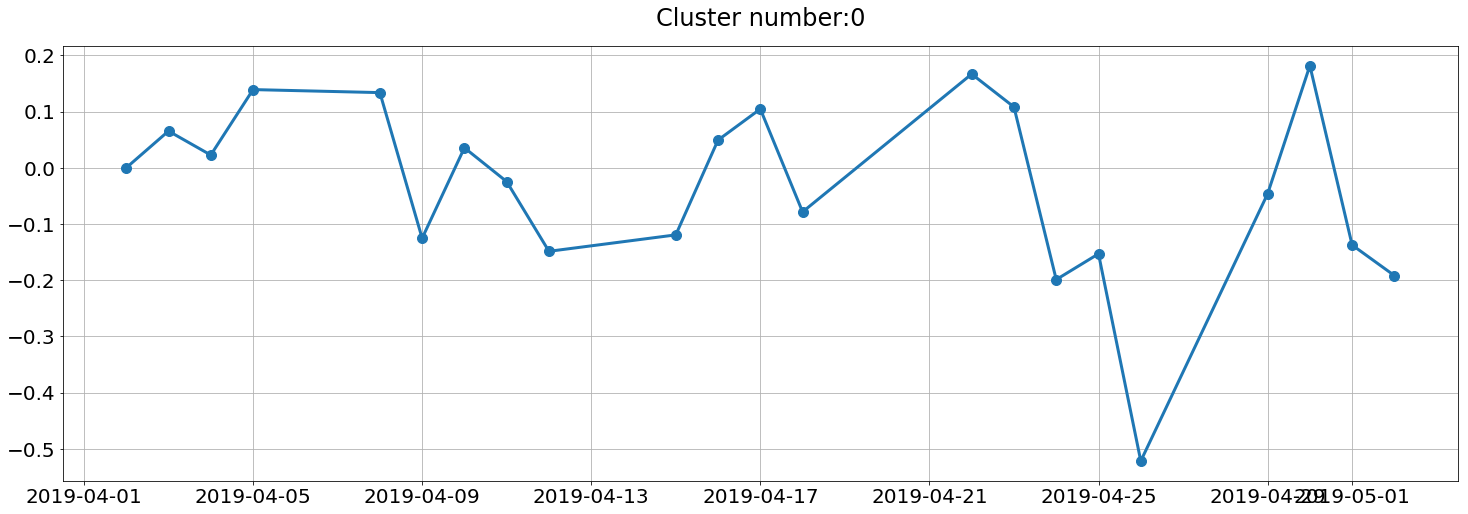

['BP plc (ADR)', 'Chevron Corporation', 'Exxon Mobil Corporation', 'Intel Corporation', 'NVIDIA Corporation']



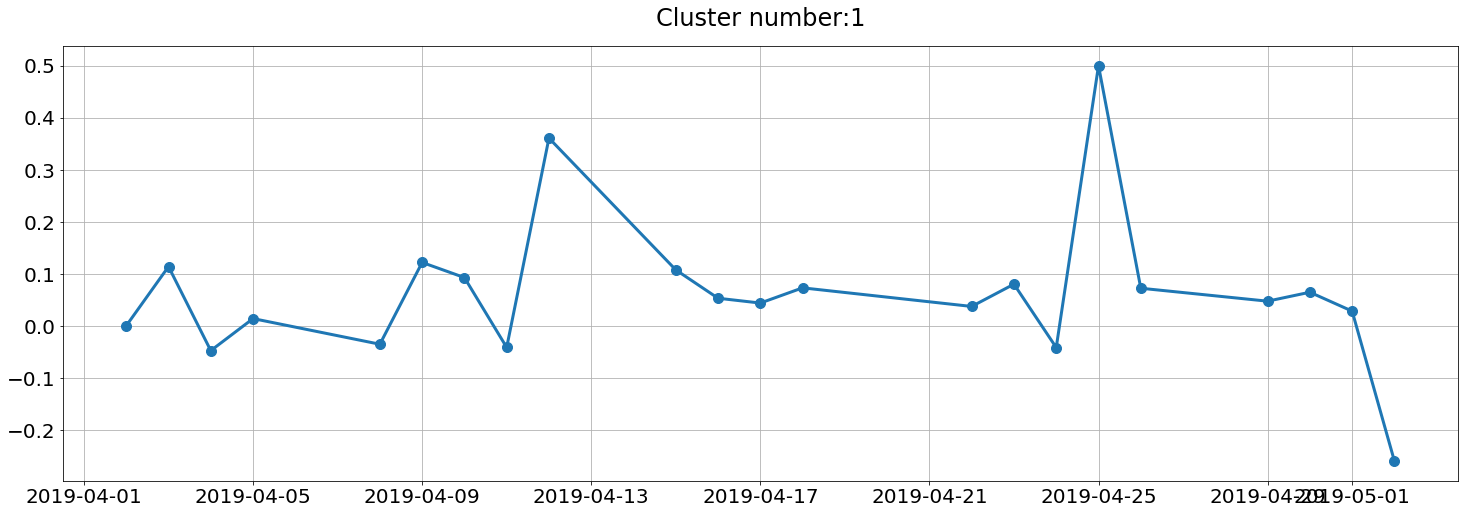

['Comcast Corporation', 'Facebook, Inc.', 'Microsoft Corporation', 'Panasonic Corporation (ADR)', 'The Walt Disney Company', 'Thomson Reuters Corporation (USA)']



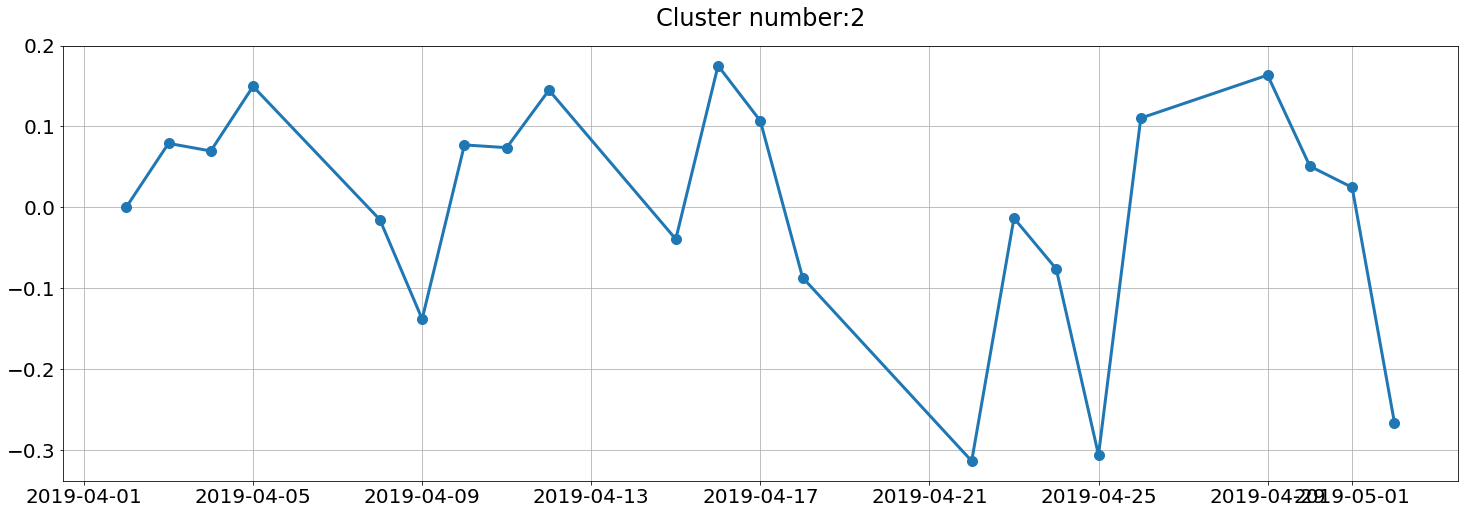

['CBS Corporation', 'Canon Inc (ADR)', 'Caterpillar Inc.', 'General Electric Company', 'Hewlett-Packard Company', 'News Corp', 'Siemens AG (ADR)', 'The New York Times Company', 'Twenty-First Century Fox Inc', 'Viacom, Inc.', 'Xerox Corp']



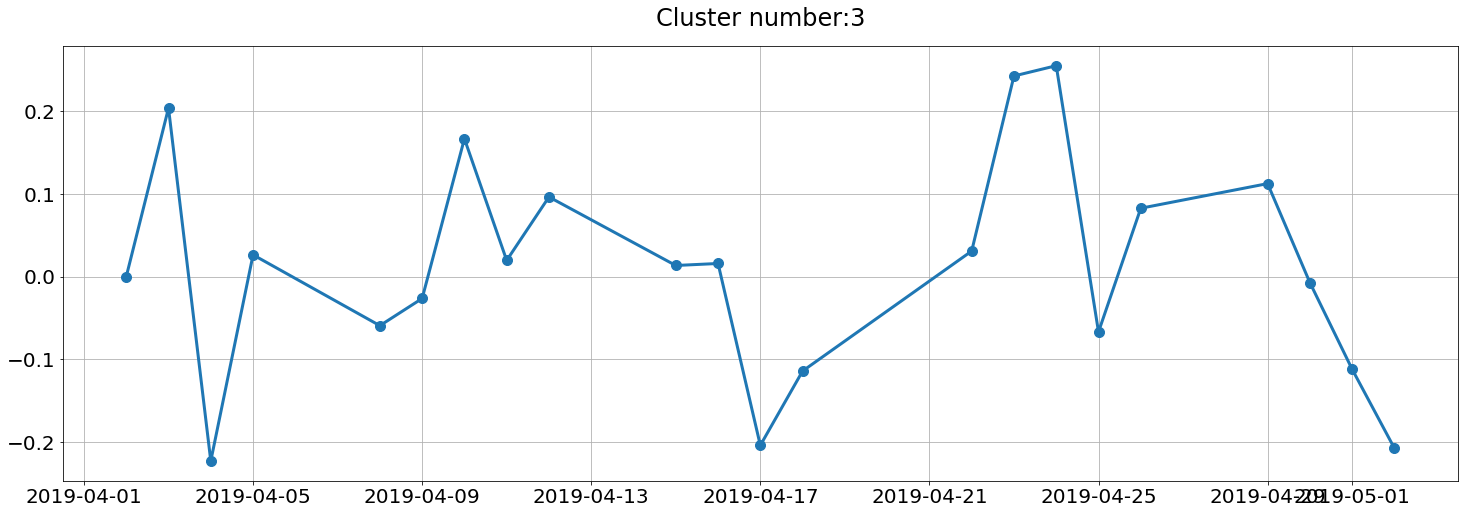

['Adobe Systems Incorporated', 'Autodesk, Inc.', 'Barnes & Noble, Inc.', 'Cisco Systems, Inc.', 'Citrix Systems, Inc.', 'Fujitsu Ltd (ADR)', 'International Business Machines Corp. (IBM)', 'Oracle Corporation', 'SAP SE (ADR)', 'Texas Instruments Incorporated', 'VMware, Inc.', 'eBay Inc', 'salesforce.com, inc.']



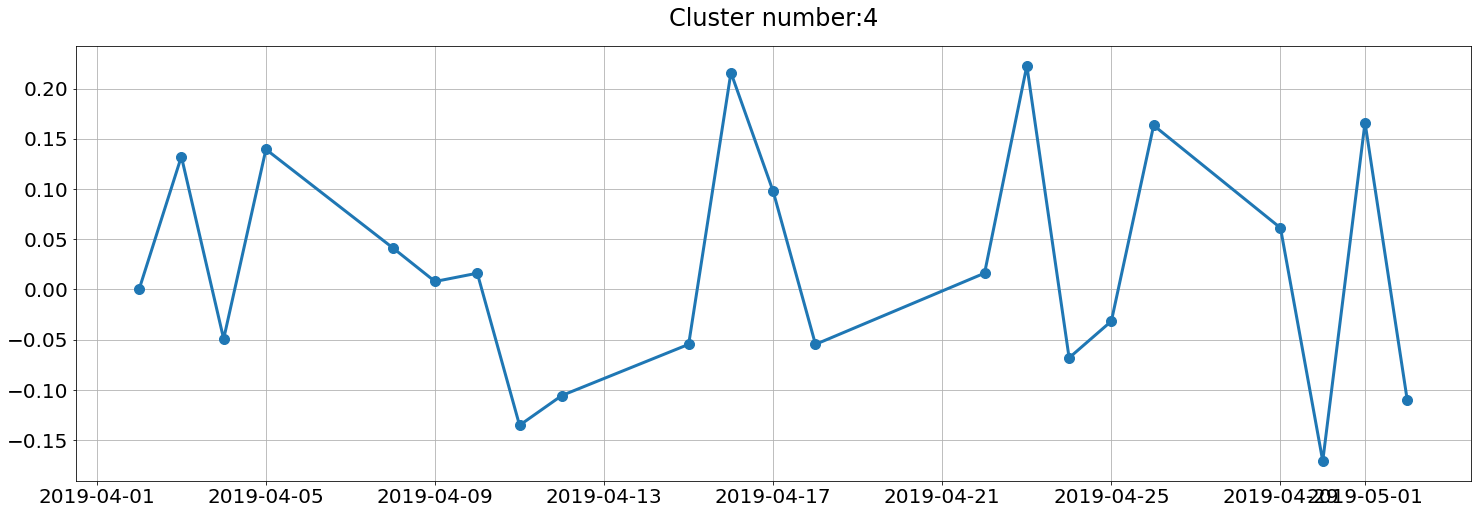

['Amazon.com, Inc.', 'Apple Inc.', 'Google', 'Hitachi, Ltd. (ADR)', 'Netflix, Inc.', 'Red Hat Inc', 'Sony Corp (ADR)', 'Toshiba Corp (USA)']



In [120]:
##Afficher tous les clusters puis chacun
def show_clusters(model,title,data):
    for cluster in model.cluster_centers_:
        plt.plot(data.columns,cluster,'o-',linewidth=3,markersize=10)
    plt.grid()
    plt.legend(np.arange(5))
    plt.title(title+' des différents clusters',fontsize=40)
    plt.show()
    i=0
#     df_cluster=df.copy()
    x=dict(zip(data.index,model.labels_))
    for cluster in model.cluster_centers_:
        #df_cluster=pivot_table(df_cluster[df_cluster['Cluster']==i],col)
        plt.plot(data.columns,cluster,'o-',linewidth=3,markersize=10)
        #plt.plot(data.columns,df_cluster.values)
        plt.title('Cluster number:'+str(i))
        plt.grid()
        plt.show()
#         print('Entreprises contenues dans le groupe:')
        print([c for c,g in x.items() if g ==i ])
        print()
        i+=1
p=pivot_table(df_actions,'Variation_Jour_Relative')
model = KMeans(n_clusters=5, random_state=32).fit(p)
        
show_clusters(model,'Variation relative journaliere',p)

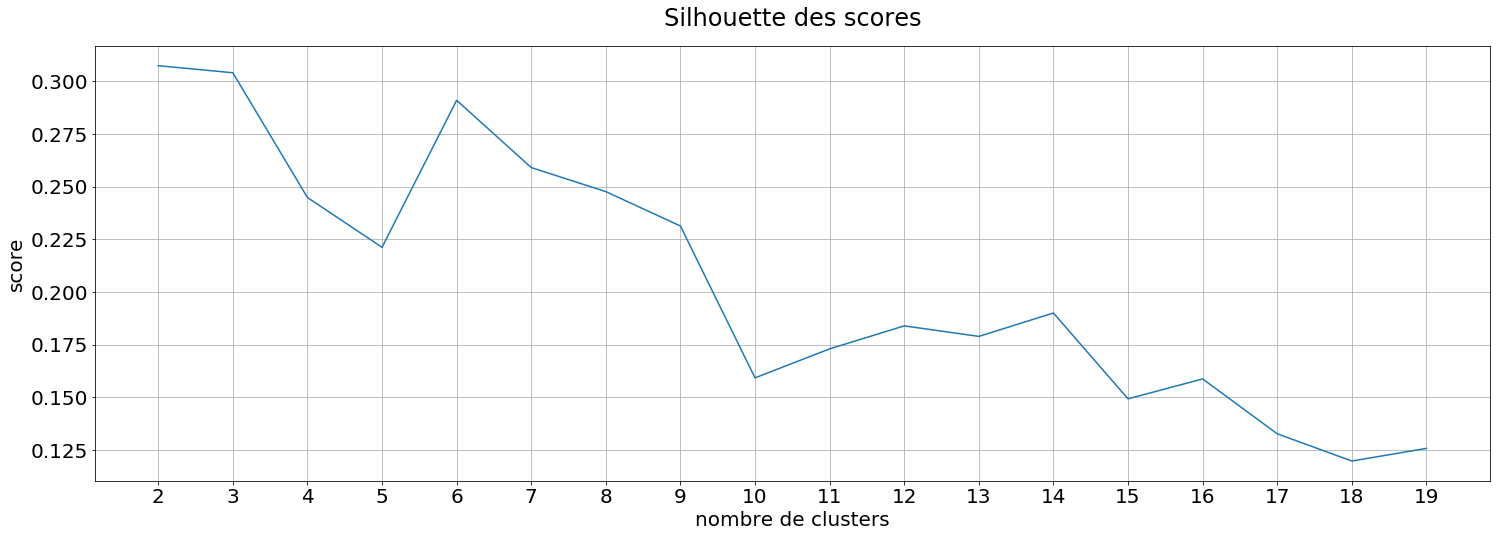

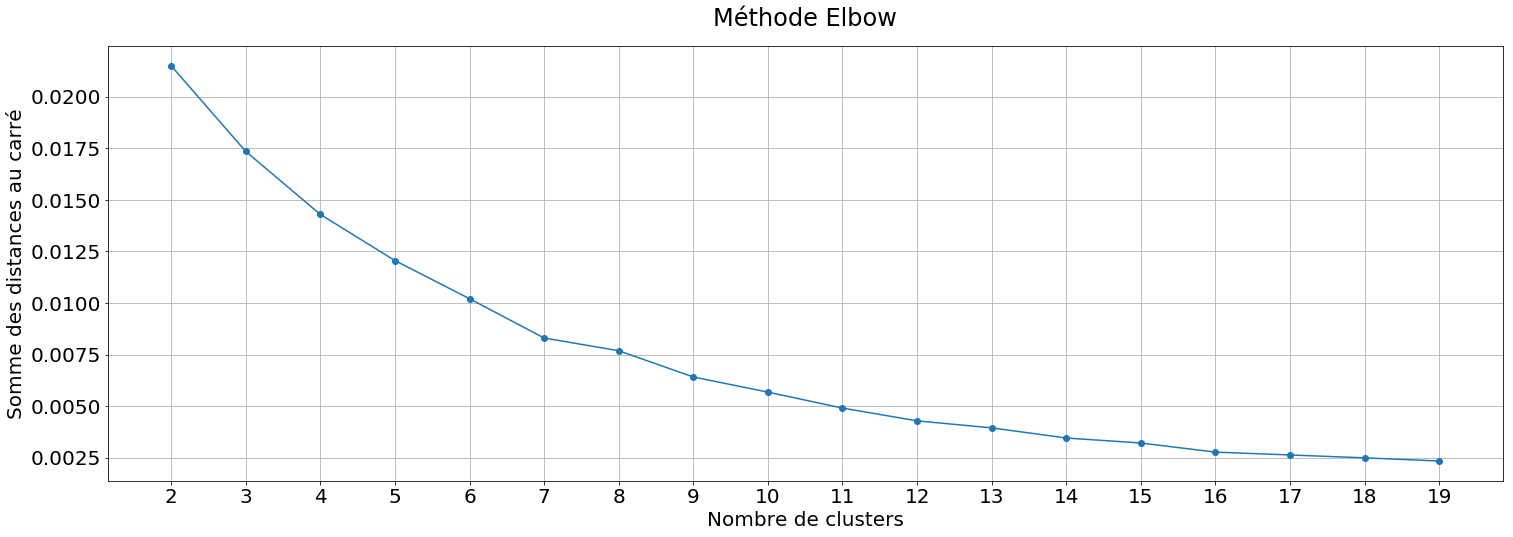

In [121]:
actions_2D=pivot_table(df_actions,'Moyenne')
evaluate(actions_2D)

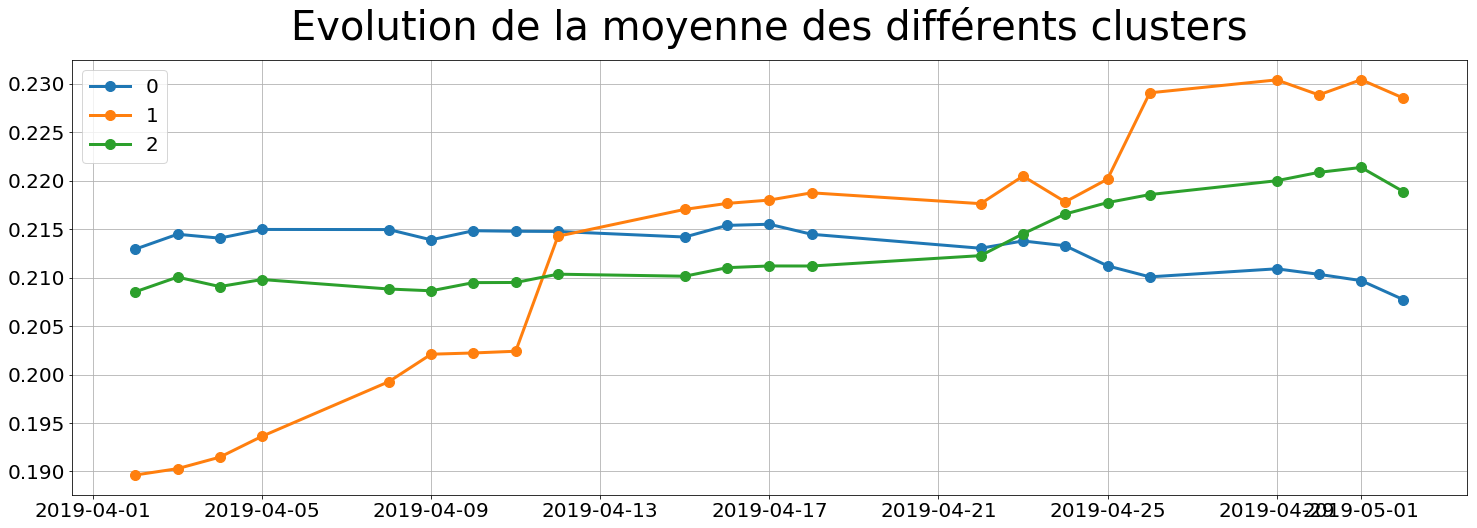

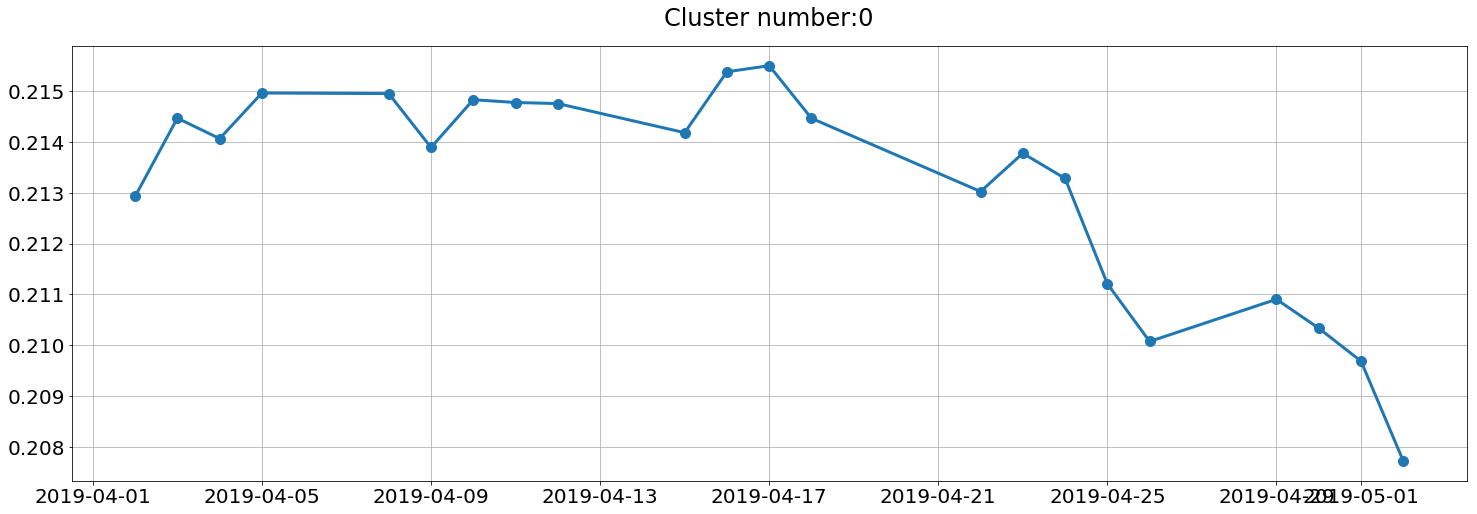

['BP plc (ADR)', 'Barnes & Noble, Inc.', 'CBS Corporation', 'Canon Inc (ADR)', 'Caterpillar Inc.', 'Chevron Corporation', 'Cisco Systems, Inc.', 'Citrix Systems, Inc.', 'Exxon Mobil Corporation', 'Fujitsu Ltd (ADR)', 'Google', 'Hewlett-Packard Company', 'Hitachi, Ltd. (ADR)', 'Intel Corporation', 'International Business Machines Corp. (IBM)', 'NVIDIA Corporation', 'News Corp', 'Red Hat Inc', 'The New York Times Company', 'Toshiba Corp (USA)', 'Viacom, Inc.', 'Xerox Corp']



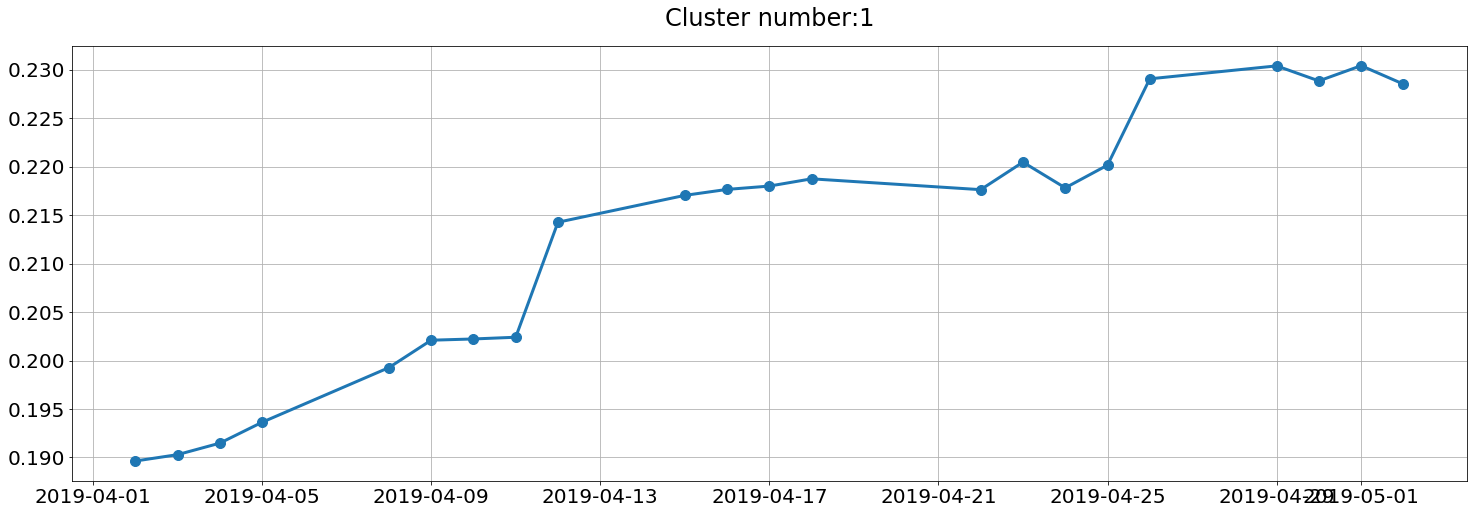

['Sony Corp (ADR)', 'The Walt Disney Company']



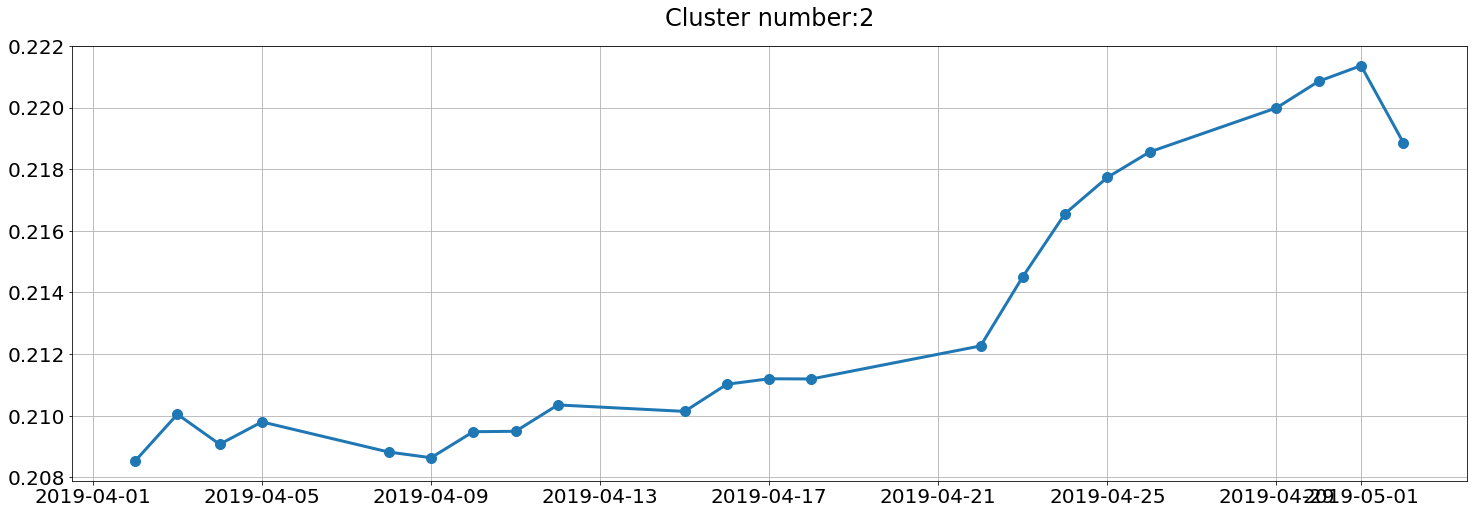

['Adobe Systems Incorporated', 'Amazon.com, Inc.', 'Apple Inc.', 'Autodesk, Inc.', 'Comcast Corporation', 'Facebook, Inc.', 'General Electric Company', 'Microsoft Corporation', 'Netflix, Inc.', 'Oracle Corporation', 'Panasonic Corporation (ADR)', 'SAP SE (ADR)', 'Siemens AG (ADR)', 'Texas Instruments Incorporated', 'Thomson Reuters Corporation (USA)', 'Twenty-First Century Fox Inc', 'VMware, Inc.', 'eBay Inc', 'salesforce.com, inc.']



In [122]:
model = KMeans(n_clusters=3, random_state=32).fit(actions_2D)
show_clusters(model,'Evolution de la moyenne',actions_2D)